**Imports**

In [66]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from xgboost import XGBClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

**Read Data**

In [67]:
# The data is separated by semicolon rather than the usual comma

df = pd.read_csv('../data/dataset.csv', sep=';')

**Data Exploration and checks**

In [68]:
df.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   uuid                                 99976 non-null  object 
 1   default                              89976 non-null  float64
 2   account_amount_added_12_24m          99976 non-null  int64  
 3   account_days_in_dc_12_24m            88140 non-null  float64
 4   account_days_in_rem_12_24m           88140 non-null  float64
 5   account_days_in_term_12_24m          88140 non-null  float64
 6   account_incoming_debt_vs_paid_0_24m  40661 non-null  float64
 7   account_status                       45603 non-null  float64
 8   account_worst_status_0_3m            45603 non-null  float64
 9   account_worst_status_12_24m          33215 non-null  float64
 10  account_worst_status_3_6m            42274 non-null  float64
 11  account_worst_status_6_12m  

In [70]:
df.describe()

,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
count,89976.000000,9.997600e+04,88140.000000,88140.000000,88140.000000,40661.000000,45603.000000,45603.000000,33215.000000,42274.000000,...,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,9.997600e+04,99976.000000,30461.000000
mean,0.014315,1.225515e+04,0.223043,5.044622,0.286896,1.331292,1.042168,1.172905,1.337348,1.185291,...,0.744299,0.800582,1.052233,1.226164,4.035429,10816.065386,6542.895325,3.920880e+04,15.329780,1.121762
std,0.118786,3.548148e+04,5.808117,22.863971,2.929910,26.482299,0.202713,0.420142,0.575043,0.443309,...,0.634912,0.719946,0.786121,0.833502,163.934564,26463.972170,19041.223585,9.064929e+04,5.031360,0.343660
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000278,1.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.600000e+03,11.622708,1.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.152082,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.599500e+04,15.792778,1.000000
75%,0.000000,4.937250e+03,0.000000,0.000000,0.000000,0.662952,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,0.000000,9029.750000,85.000000,4.384425e+04,19.542014,1.000000
max,1.000000,1.128775e+06,365.000000,365.000000,97.000000,3914.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,5.000000,36479.000000,571475.000000,341859.000000,2.962870e+06,23.999722,3.000000


We will create separate lists for the categorical and the numeric column names. We could do this by using df.select_dtypes but in this problem, I'd rather specify the feature names from the problem statement itself for clarity of code. 

In [71]:
# From problem description 

categorical_cols = ['default', 'account_status', 'account_worst_status_0_3m', 'account_worst_status_12_24m',
                    'account_worst_status_3_6m', 'account_worst_status_6_12m', 'merchant_category',
                    'merchant_group', 'name_in_email', 'status_last_archived_0_24m', 
                    'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m',
                    'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
                    'status_max_archived_0_24_months', 'worst_status_active_inv', 'has_paid']

numeric_cols = df.drop(categorical_cols, axis=1).columns.tolist()

Let's first set aside the test data in order to avoid any sort of bias. The test data consists of the rows where the 'default' column is missing.


In [72]:
test = df[df['default'].isnull()].drop(['default'], axis=1)
train = df.dropna(subset=['default'], axis=0)

In [73]:
test.to_csv('../data/test.csv', index=False)
train.to_csv('../data/train.csv', index=False)

In [74]:
target = train['default']
train = train.drop(['uuid', 'default'], axis=1)

In [75]:
print('Shape of the test data:', test.shape)

Shape of the test data: (10000, 42)


In [76]:
print('Shape of the training data:', train.shape)

Shape of the training data: (89976, 41)


Ideally, for the remainder of the project we will not look at the test data. We will do all of our data exploration and modelling on the train data itself. 

**The target variable** <br>
The goal here is to build a model that can predict the probability of a loan default given a set of features. Before we get into more EDA and model building, we'll do a quick exploration of the target variable, or the dependent variable, 'default'.

0.0    0.985685
1.0    0.014315
Name: default, dtype: float64

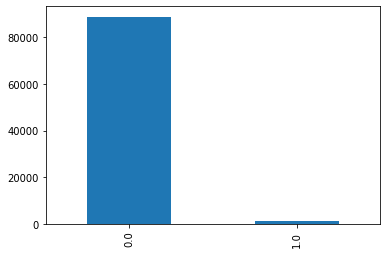

In [77]:
target.value_counts().plot(kind='bar');
display(target.value_counts(normalize=True))

As expected in such problems, the target variable is heavily imbalanced. The defaults occur only **1.43%** of the times. 
We can either treat this as an **imbalanced classification** problem, or we can treat it as an **anomaly detection** problem.

Before diving into further data exploration, let's quickly train a model and try to get an idea of feature importances from it. We can then do deep dives into individual features, and maybe engineer a few features as well.

For that, we will first have to take care of the missing values, as well as the categorical features.

**Missing Values**

In [78]:
# Get sub-dataframe of just the missing columns

missing = train.isnull().mean()
cols_with_missing = missing[missing > 0].index

display(missing[missing > 0].sort_values(ascending=False))

missing = train[cols_with_missing]

worst_status_active_inv                0.695074
account_worst_status_12_24m            0.667456
account_worst_status_6_12m             0.603639
account_incoming_debt_vs_paid_0_24m    0.593014
account_worst_status_3_6m              0.577243
account_status                         0.543856
account_worst_status_0_3m              0.543856
avg_payment_span_0_3m                  0.493265
avg_payment_span_0_12m                 0.238597
num_active_div_by_paid_inv_0_12m       0.229595
num_arch_written_off_0_12m             0.181215
num_arch_written_off_12_24m            0.181215
account_days_in_dc_12_24m              0.118732
account_days_in_rem_12_24m             0.118732
account_days_in_term_12_24m            0.118732
dtype: float64

For the purposes of this baseline model, we will just **drop the columns which have missing values**. 
Since we are straight up dropping the columns, it won't matter whether we do this after a train-validation split or before. 

In [79]:
def drop_missing_cols(df, cols):
    return df.drop(cols, axis=1)

In [80]:
# train = drop_missing_cols(train, cols_with_missing)

In [81]:
train = train.drop('merchant_category', axis=1)

In [82]:
train.shape

(89976, 40)

In [83]:
FINAL_COLUMNS = train.columns.tolist()

The number of columns have reduced from 42 to 26 after dropping the columns with missing values. 

**Create a train-validation split** <br>
Before we proceed further, this would be a good point to create a train-validation split and continue pre-processing this smaller training data. 
Since the number of data points vs. features is fairly high, we will go ahead with a train-val split rather than cross-validation (at least for this baseline model).

In [84]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=1)

In [85]:
print('Training data shape:', X_train.shape)
print('Validation data shape:', X_val.shape)

Training data shape: (71980, 40)
Validation data shape: (17996, 40)


**Categorical Columns** <br>
We know that models require us to convert variables where the categorical variables aren't encoded as numbers. This can be done either through Label Encoding or One Hot Encoding. 
For this baseline approach, we will just OHE all the categorical variables. 

In [86]:
# Extract DF of categorical columns
cat_cols_final = [col for col in categorical_cols if col in X_train.columns]
cat_df_train = X_train[cat_cols_final]

In [87]:
cat_df_train.head(3)

,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,account_worst_status_6_12m,merchant_group,name_in_email,status_last_archived_0_24m,status_2nd_last_archived_0_24m,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,worst_status_active_inv,has_paid
25564,1.0,1.0,NaN,1.0,1.0,Clothing & Shoes,F+L,1,1,1,1,2,2,NaN,True
42077,NaN,NaN,NaN,NaN,NaN,Health & Beauty,Nick,1,0,0,1,1,1,NaN,True
47940,1.0,1.0,1.0,1.0,1.0,Home & Garden,F+L,1,1,1,2,2,2,1.0,True


In [88]:
print(f'Number of categorical columns: {cat_df_train.shape[1]}')

Number of categorical columns: 15


In [89]:
# Get count of unique values in each column so that we understand how our dataframe will expand upon OHE
cat_df_train.nunique()

account_status                      4
account_worst_status_0_3m           4
account_worst_status_12_24m         4
account_worst_status_3_6m           4
account_worst_status_6_12m          4
merchant_group                     12
name_in_email                       8
status_last_archived_0_24m          5
status_2nd_last_archived_0_24m      5
status_3rd_last_archived_0_24m      5
status_max_archived_0_6_months      4
status_max_archived_0_12_months     5
status_max_archived_0_24_months     5
worst_status_active_inv             3
has_paid                            2
dtype: int64

The 'merchant_category' column will cause our dataframe to explode and contain too many columns. For the purposes of this baseline approach, we will just drop that column and instead use the 'merchant_group' as a fairly good proxy for the 'merchant_category' problem. 

In [90]:
FINAL_CAT_COLS = cat_df_train.columns.tolist()

In [91]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

ohe_data = ohe.fit_transform(cat_df_train)
cat_df_train = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out()).astype(int)

In [92]:
print(f'Shape of categorical data after OHE: {cat_df_train.shape}')

Shape of categorical data after OHE: (71980, 80)


We now have converted our categorical columns into the right data format in order to feed it to an ML model. We will combine the numeric dataframe with the categorical one to get our entire training DF.

In [93]:
categorical_cols = FINAL_CAT_COLS
numeric_cols = list(set(FINAL_COLUMNS) - set(FINAL_CAT_COLS))

cat_df = X_train[categorical_cols]
numeric_df = X_train[numeric_cols]

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

ohe_data = ohe.fit_transform(cat_df)
cat_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(), index=cat_df.index).astype(int)

X_train = pd.concat([numeric_df, cat_df], axis=1)

In [94]:
# OHE for X_val
cat_df_val = X_val[categorical_cols]
numeric_df_val = X_val[numeric_cols]

ohe_data = ohe.transform(cat_df_val)
cat_df_val = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(), index=cat_df_val.index).astype(int)

X_val = pd.concat([numeric_df_val, cat_df_val], axis=1)

In [95]:
print(f'Train data shape after OHE: {X_train.shape}')
print(f'Validation data shape after OHE: {X_val.shape}')

Train data shape after OHE: (71980, 105)
Validation data shape after OHE: (17996, 105)


**Model Building and Evaluation**

In [96]:
# Quickly check target variable distribution in train and validation data
print('Target distribution in train data')
display(y_train.value_counts(normalize=True))

print('Target distribution in validation data')
display(y_val.value_counts(normalize=True))

Target distribution in train data


0.0    0.985746
1.0    0.014254
Name: default, dtype: float64

Target distribution in validation data


0.0    0.985441
1.0    0.014559
Name: default, dtype: float64

In [97]:
model = XGBClassifier(random_state=1)

In [98]:
# Fit the model on train data
model.fit(X_train, y_train)

[23:20:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
# Get predictions for train and test data:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [100]:
# Model evaluation
print('Model performance on training data:\n')
print(classification_report(y_train, y_pred_train))
print(f'ROC AUC Score: {round(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]), 2)}')

Model performance on training data:

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     70954
         1.0       1.00      0.57      0.73      1026

    accuracy                           0.99     71980
   macro avg       1.00      0.78      0.86     71980
weighted avg       0.99      0.99      0.99     71980

ROC AUC Score: 0.99


This simple basline model is performing quite well on the training data. Let's look at the validation data to see if this is due to some overfitting. 

In [101]:
# Model evaluation
print('Model performance on validation data:\n')
print(classification_report(y_val, y_pred_val))
print(f'ROC AUC Score: {round(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]), 2)}')

Model performance on validation data:

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     17734
         1.0       0.71      0.11      0.20       262

    accuracy                           0.99     17996
   macro avg       0.85      0.56      0.60     17996
weighted avg       0.98      0.99      0.98     17996

ROC AUC Score: 0.9


The model is clearly overfitting on our data. For now, we won't concern ourselves with improving the results of this model since the purpose of this activity is to just build an end-to-end pipeline that functions from an engineering standpoint. 

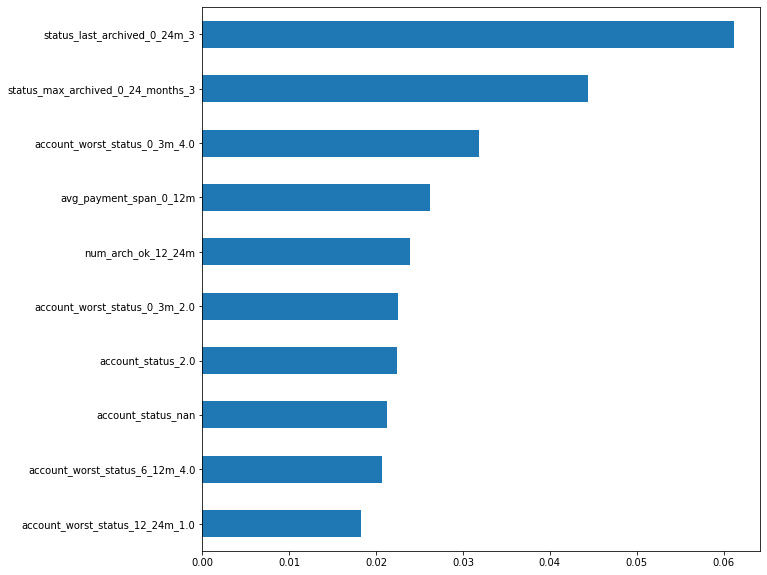

In [102]:
plt.figure(figsize=(10, 10))
pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=True).tail(10).plot(kind='barh');

For our experiments, let's define a function that evaluates the given model on our train and validation dataset. 

In [103]:
def evaluate_model(X, y, X_train, X_val):
    model = XGBClassifier(random_state=1)
    model.fit(X, y)
    
    # Get predictions for train and test data:
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Model evaluation on training data
    print('Model performance on training data:\n')
    print(classification_report(y_train, y_pred_train))
    print(f'ROC AUC Score: {round(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]), 2)}')
    
    # Model evaluation on validation data
    print('Model performance on validation data:\n')
    print(classification_report(y_val, y_pred_val))
    print(f'ROC AUC Score: {round(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]), 2)}')

**Dealing with the class imbalance**

We will try out different methods of dealing with the oversampling and see how it changes the model outputs.

**Random Oversampling**

In [104]:
from imblearn.over_sampling import RandomOverSampler

In [105]:
ros = RandomOverSampler(random_state=1)

In [106]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [107]:
evaluate_model(X_resampled, y_resampled, X_train, X_val)

[23:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model performance on training data:

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     70954
         1.0       0.21      0.99      0.34      1026

    accuracy                           0.95     71980
   macro avg       0.60      0.97      0.66     71980
weighted avg       0.99      0.95      0.96     71980

ROC AUC Score: 1.0
Model performance on validation data:

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     17734
         1.0       0.10      0.49      0.17       262

    accuracy                           0.93     17996
   macro avg       0.55      0.71      0.57     17

**SMOTE**

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
smote = SMOTE()

In [110]:
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [111]:
#evaluate_model(X_resampled, y_resampled, X_train, X_val)

**ADASYN**

In [112]:
from imblearn.over_sampling import ADASYN

In [113]:
adasyn = ADASYN()

In [114]:
#X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [115]:
#evaluate_model(X_resampled, y_resampled, X_train, X_val)

**Random Undersampling**

In [116]:
from imblearn.under_sampling import RandomUnderSampler

In [117]:
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=1)

In [118]:
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [119]:
evaluate_model(X_resampled, y_resampled, X_train, X_val)

[23:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model performance on training data:

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     70954
         1.0       0.11      0.96      0.19      1026

    accuracy                           0.88     71980
   macro avg       0.55      0.92      0.56     71980
weighted avg       0.99      0.88      0.93     71980

ROC AUC Score: 0.97
Model performance on validation data:

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93     17734
         1.0       0.08      0.73      0.15       262

    accuracy                           0.88     17996
   macro avg       0.54      0.80      0.54     1

On this undersampled data, our model is finally not overfitting too much.

In [120]:
# Re-train the model on entire data and save it
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

X_resampled, y_resampled = rus.fit_resample(X, y)

In [121]:
final_model = XGBClassifier(random_state=1)
final_model.fit(X_resampled, y_resampled)

[23:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Save model and other variables as .pkl files**

In [122]:
# Save the final model

with open('../models/xgboost.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [123]:
# Save the one hot encoder

with open('../models/ohe.pkl', 'wb') as file:
    pickle.dump(ohe, file)

In [124]:
# Save the categorical and numeric columns as well

with open('../models/cat_cols.pkl', 'wb') as file:
    pickle.dump(categorical_cols, file)
    
with open('../models/num_cols.pkl', 'wb') as file:
    pickle.dump(numeric_cols, file)

In [125]:
# Final model columns after OHE

model_cols = X_train.columns.tolist()

with open('../models/model_cols.pkl', 'wb') as file:
    pickle.dump(model_cols, file)

**Predict on the test set and save the results**

In [126]:
uuid = test['uuid'].values.tolist()
test_num = test[numeric_cols]
test_cat = test[categorical_cols]

ohe_data = ohe.transform(test_cat)
test_cat = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(),
                        index=test_cat.index).astype(int)

test = pd.concat([test_num, test_cat])

In [135]:
preds = final_model.predict_proba(test)[:, 1]
preds = pd.DataFrame(zip(uuid, preds), columns=['uuid', 'pd'])

In [136]:
preds.to_csv('../results.csv', index=False)